<a href="https://colab.research.google.com/github/bahmello/Cursos-Alura/blob/main/Projeto_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!pip install opencv-python==4.6.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

ERROR: Ignored the following yanked versions: 3.4.11.39, 3.4.17.61, 4.4.0.42, 4.4.0.44, 4.5.4.58, 4.5.5.62, 4.7.0.68
ERROR: Could not find a version that satisfies the requirement opencv-python==4.6.0 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.60, 4.5.5.64, 4.6.0.66, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80, 4.10.0.82, 4.10.0.84, 4.11.0.86)
ERROR: No matching distribution found for opencv-python==4.6.0
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [79]:
!git clone https://github.com/sthemonica/text-recognize

fatal: destination path 'text-recognize' already exists and is not an empty directory.


In [80]:
import pytesseract
import numpy as np
import cv2
import re
import os
import matplotlib.pyplot as plt

from PIL import ImageFont, ImageDraw, Image
from pytesseract import Output
from google.colab.patches import cv2_imshow

In [81]:
pytesseract.__version__

'0.3.9'

In [82]:
cv2.__version__

'4.11.0'

In [83]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

mkdir: cannot create directory ‘tessdata’: File exists
--2025-06-08 19:38:15--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata [following]
--2025-06-08 19:38:15--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata [following]
--2025-06-08 19:38:15--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubus

Entendendo os Dados

In [84]:
projeto = "/content/text-recognize/Imagens/Projeto"
caminho = [os.path.join(projeto, f) for f in os.listdir(projeto)]
print(caminho)

['/content/text-recognize/Imagens/Projeto/artigo-spark.png', '/content/text-recognize/Imagens/Projeto/artigo-desbalanceamento.png', '/content/text-recognize/Imagens/Projeto/artigo-termos-ML.png', '/content/text-recognize/Imagens/Projeto/artigo-eng-dados.png']


In [85]:
def mostrar(img):
  fig = plt.gcf() #busca a figura atual
  fig.set_size_inches(20, 10) #define o tamanho
  plt.axis("off") #remove a visualização dos eixos
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #faz a conversão de cores com o OpenCV
  plt.show()

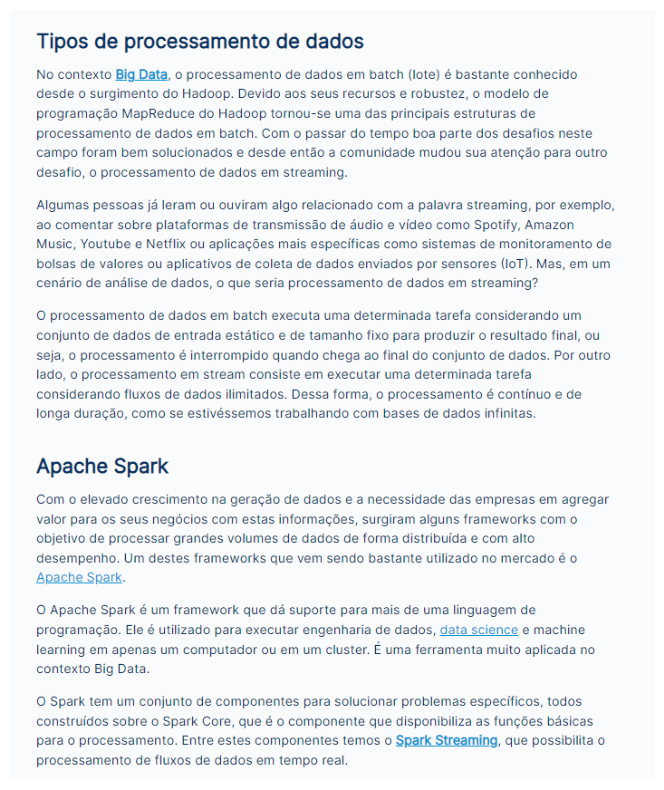

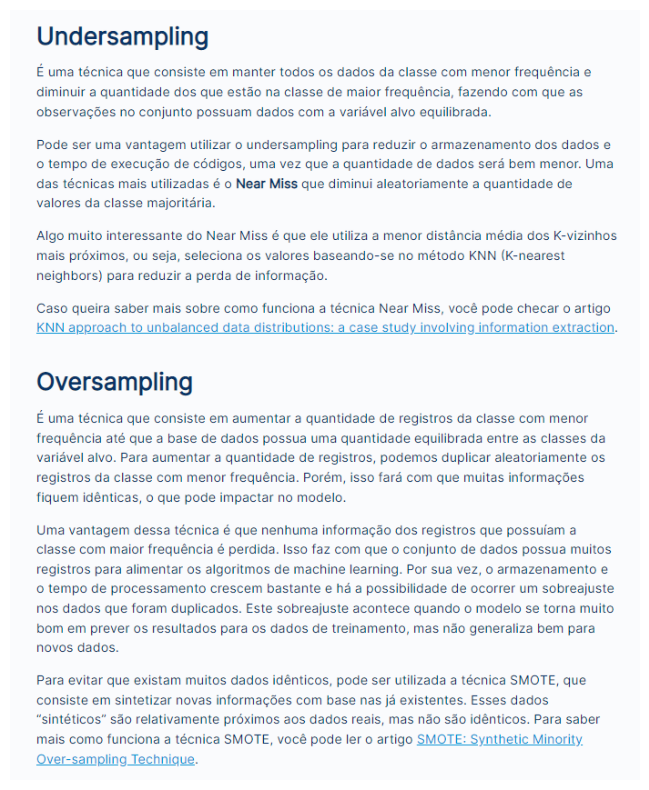

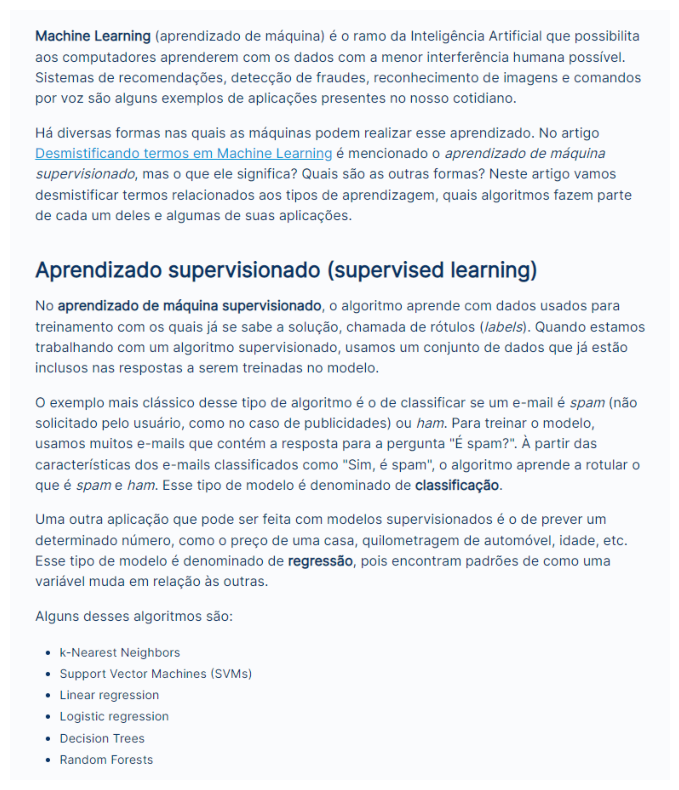

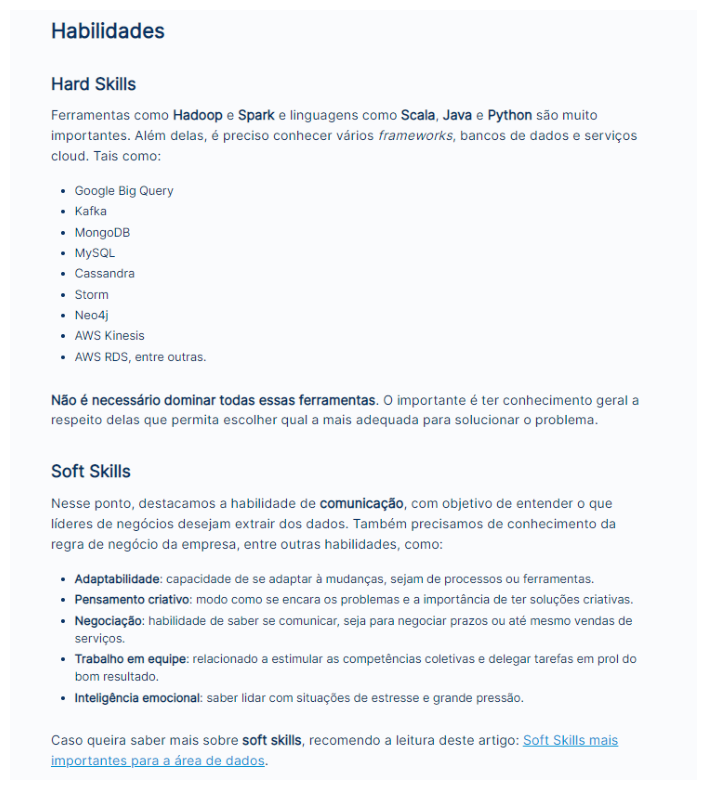

In [86]:
for imagem in caminho:
  imagem = cv2.imread(imagem)
  mostrar(imagem)

In [87]:
config_tesseract = "--tessdata-dir tessdata"

def OCR_processa(img, config_tesseract):
  texto = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
  return texto

Reconhecimento de Texto

In [88]:
texto_completo = '' #concatenar textos nessa variável
nome_txt = 'resultados_ocr.txt'

In [89]:
for imagem in caminho:
  img = cv2.imread(imagem)
  nome_imagem = os.path.split(imagem)[-1] #recebe os nomes e diretórios das imagens, quebrados, precisamos apenas do -1 (última posição do diretório)
  nome_divisao = '======================\n' + str(nome_imagem) #divisao + nome da imagem que está sendo vista
  texto_completo = texto_completo + nome_divisao + '\n'
  texto = OCR_processa(img, config_tesseract) #passa a imagem que vamos utilizar
  texto_completo = texto_completo + texto

In [90]:
texto_completo

'======================\nartigo-spark.png\nTipos de processamento de dados\n\nNo contexto Big Data, o processamento de dados em batch (lote) é bastante conhecido\ndesde o surgimento do Hadoop. Devido aos seus recursos e robustez, o modelo de\nprogramação MapReduce do Hadoop tornou-se uma das principais estruturas de\nprocessamento de dados em batch. Com o passar do tempo boa parte dos desafios neste\ncampo foram bem solucionados e desde então a comunidade mudou sua atenção para outro\ndesafio, o processamento de dados em streaming.\n\nAlgumas pessoas já leram ou ouviram algo relacionado com a palavra streaming, por exemplo,\nao comentar sobre plataformas de transmissão de áudio e vídeo como Spotify, Amazon\nMusic, Youtube e Netflix ou aplicações mais específicas como sistemas de monitoramento de\nbolsas de valores ou aplicativos de coleta de dados enviados por sensores (loT). Mas, em um\ncenário de análise de dados, o que seria processamento de dados em streaming?\n\nO processamento de

In [91]:
#Salvando o arquivo em txt
arquivo_txt = open(nome_txt, 'w+') #a+ é para colocar no final do arquivo, w+ para sobre escrever o arquivo
arquivo_txt.write(texto_completo + '\n')
arquivo_txt.close()

Busca de Ocorrências

In [92]:
termo_pesquisa = 'learning'

In [93]:
with open(nome_txt) as f: #abre o doc txt
  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, f.read())] #ocorrencia é uma lista

In [94]:
ocorrencias

[1991, 4058, 5561]

In [95]:
for imagem in caminho:
  img = cv2.imread(imagem)
  nome_imagem = os.path.split(imagem)[-1] #passa a imagem e acessa a última posição do diretório
  print('======================\n' + str(nome_imagem))

  texto = OCR_processa(img, config_tesseract) #usando o OCR

  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, texto)]

  print('Número de ocorrências para o termo: {}: {}'.format(termo_pesquisa, len(ocorrencias)))

  print('\n')

artigo-spark.png
Número de ocorrências para o termo: learning: 1


artigo-desbalanceamento.png
Número de ocorrências para o termo: learning: 1


artigo-termos-ML.png
Número de ocorrências para o termo: learning: 1


artigo-eng-dados.png
Número de ocorrências para o termo: learning: 0




Reconhecimento na Imagem

In [96]:
fonte_dir = '/content/text-recognize/Imagens/calibri.ttf'

In [97]:
def escreve_texto(texto, x, y, img, fonte_dir, cor=(50, 50, 225),tamanho=16):
  fonte = Image.Font.truetype(fonte_dir, tamanho)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y-tamanho), texto, font = fonte, fill = cor)
  img = np.array(img_pil)

  return img

In [98]:
min_conf = 30 #@param {type: "slider", min:0, max:100}

In [113]:
def caixa_texto(i, resultado, img, cor=(255, 100, 0)):
  x = resultado["left"][i]
  y = resultado["top"][i]
  w = resultado["width"][i]
  h = resultado["height"][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

  return x, y, img

In [124]:
def OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf):
  resultado = pytesseract.image_to_data(img, config=config_tesseract, lang='por', output_type=Output.DICT) #imagem para dados, que já fizemos anteriormente
  num_ocorrencias = 0 #inicializando como 0

  for i in range(0, len(resultado['text'])): # vai de 0 ao tamanho do número de valores do texto
    confianca = int(resultado['conf'][i]) # qual a confiança da detecção
    if confianca > min_conf: # se a confiança for maior que o valor mínimo, passa para a linha abaixo
      texto = resultado['text'][i] #texto será igual ao resultado text no momento i
      if termo_pesquisa.lower() in texto.lower(): #se o termo de pesquisa estiver no texto:
        x, y, img = caixa_texto(i, resultado, img, (0,0,255)) # faz a caixa de bounding box

        num_ocorrencias += 1 #faz a iteração no num de ocorrências e volta para o laço até acabar o texto
  return img, num_ocorrencias

artigo-spark.png
Número de ocorrências para learning em artigo-spark.png: 1




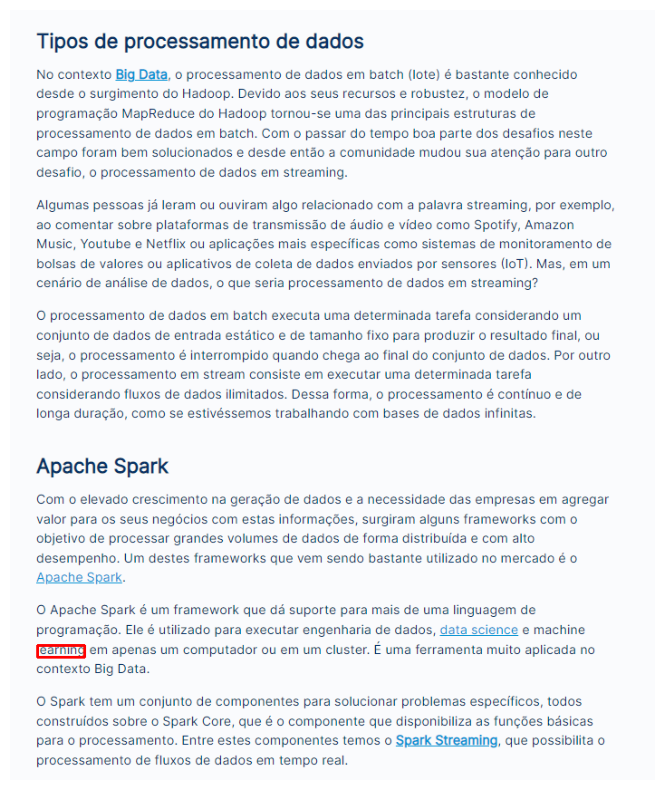

artigo-desbalanceamento.png
Número de ocorrências para learning em artigo-desbalanceamento.png: 1




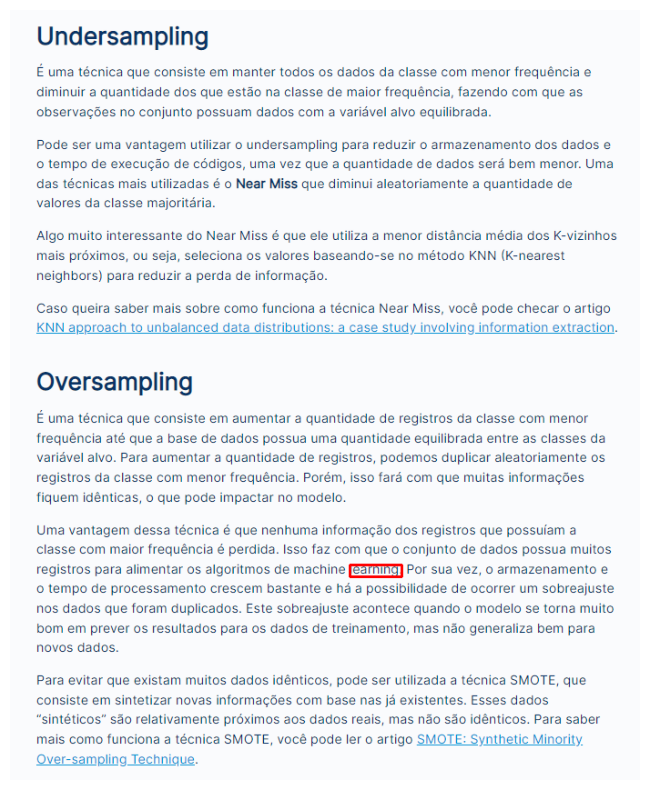

artigo-termos-ML.png
Número de ocorrências para learning em artigo-termos-ML.png: 3




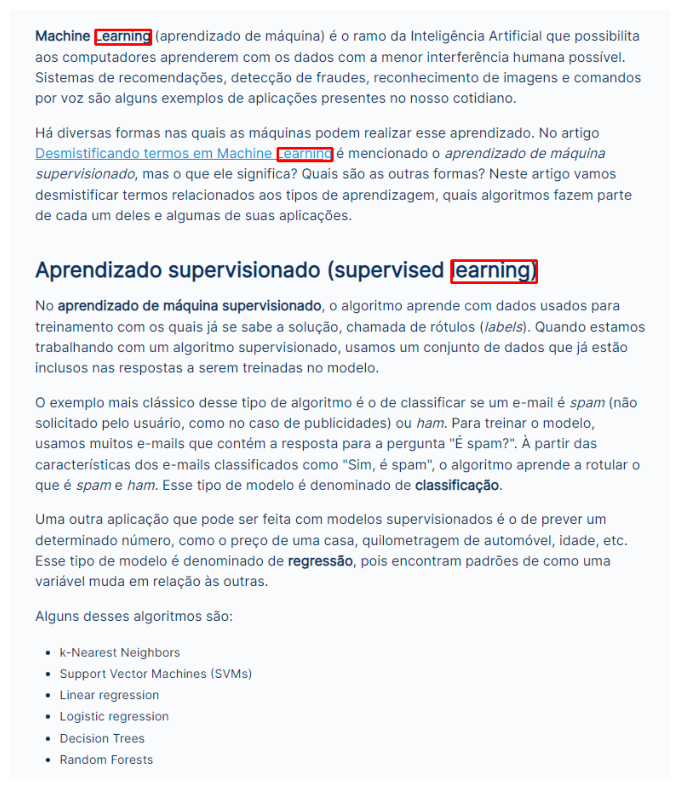

artigo-eng-dados.png
Número de ocorrências para learning em artigo-eng-dados.png: 0




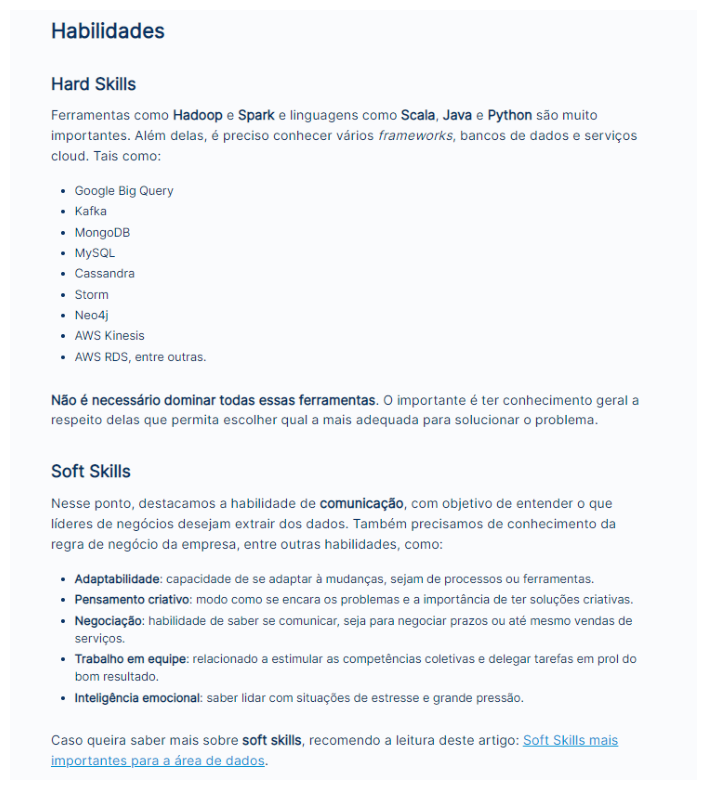

In [125]:
termo_pesquisa = 'learning'

for imagem in caminho:
  img = cv2.imread(imagem) #carrega a imagem
  img_original = img.copy() #cria uma cópia da imagem para não escrever em cima da original

  nome_imagem = os.path.split(imagem)[-1] # passa a imagem e acessa a última posição do diretório
  print('===================\n' + str(nome_imagem))  # separação + nome da imagem

  img, numero_ocorrencias = OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf) #usando o OCR_processa_imagem
  print('Número de ocorrências para {} em {}: {}'.format(termo_pesquisa, nome_imagem, numero_ocorrencias))
    #primeira chaves é para termo de pesquisa e a segunda nome das imagens e a terceira é o numeros de ocorrencias
  print('\n')

  mostrar(img)